# Ai driven Crop Recommendation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "dataset.csv"
df = pd.read_csv(file_path)

print("Dataset Info:")
df.info()

print("\nFirst 5 Rows:")
print(df.head())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nSummary Statistics:")
print(df.describe())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       620 non-null    int64  
 1   P       620 non-null    int64  
 2   K       620 non-null    int64  
 3   ph      620 non-null    float64
 4   EC      620 non-null    float64
 5   S       620 non-null    float64
 6   Cu      620 non-null    float64
 7   Fe      620 non-null    float64
 8   Mn      620 non-null    float64
 9   Zn      620 non-null    float64
 10  B       620 non-null    float64
 11  label   620 non-null    object 
dtypes: float64(8), int64(3), object(1)
memory usage: 58.3+ KB

First 5 Rows:
     N   P    K   ph    EC     S     Cu      Fe     Mn     Zn      B  \
0  143  69  217  5.9  0.58  0.23  10.20  116.35  59.96  54.85  21.29   
1  170  36  216  5.9  0.15  0.28  15.69  114.20  56.87  31.28  28.62   
2  158  66  219  6.8  0.34  0.20  15.29   65.87  51.81  57.12  27.59 

<Figure size 1200x600 with 0 Axes>

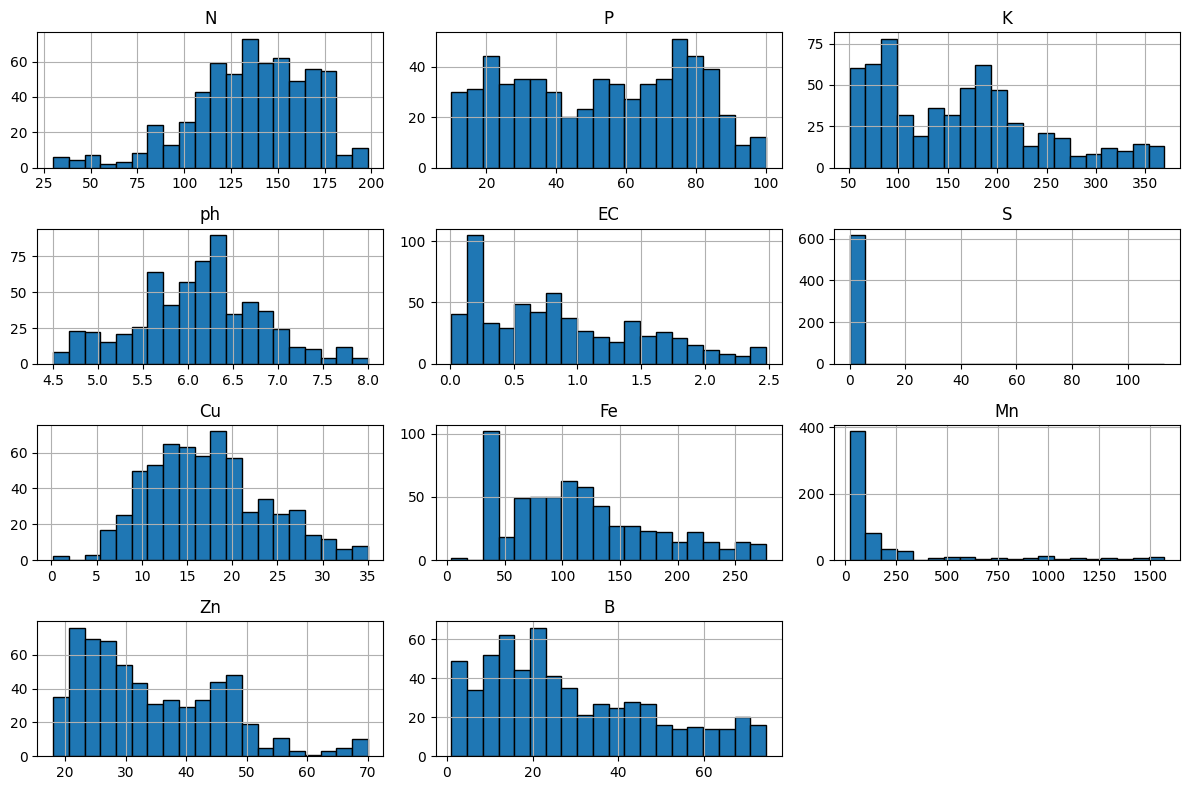

In [ ]:
plt.figure(figsize=(12, 6))
df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()



#### **Feature Distributions (Histograms)**
- The histogram plots show that **N (Nitrogen), P (Phosphorus), and K (Potassium)** have **right-skewed distributions**, meaning some soil samples have significantly higher values.
- **pH levels are mostly between 5.5 and 7.5**, which is a suitable range for most crops.
- **Micronutrient levels (Cu, Fe, Mn, Zn, B) have wide variations**, suggesting that different regions might have different soil compositions.

**Insight:**  
- Some nutrients may require standardization due to their skewed distribution.
- There could be outliers in certain features, especially in micronutrients like **Mn and Fe**, which show a very high range.



/var/folders/fv/wvd6zmm16r338c7g8r2gpyhm0000gn/T/ipykernel_70831/1545610108.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['label'], order=df['label'].value_counts().index, palette='viridis')


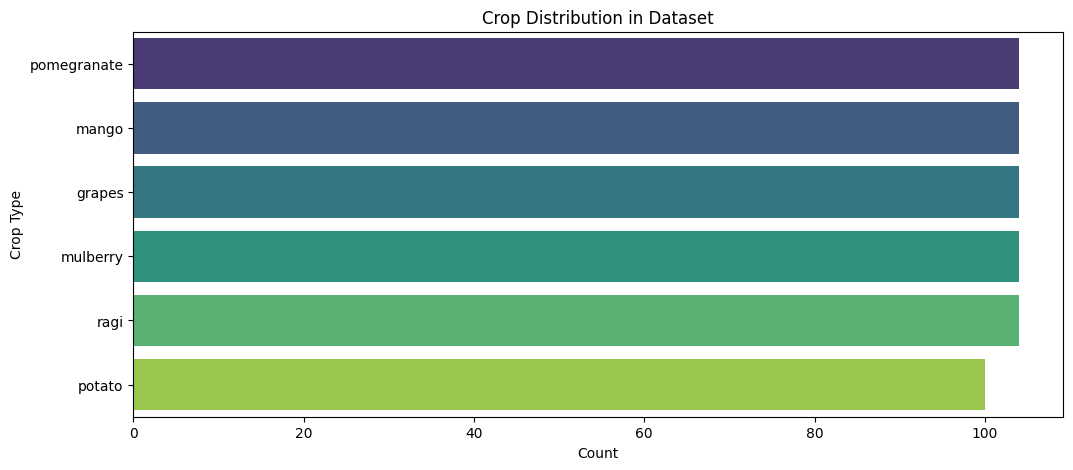

In [ ]:
plt.figure(figsize=(12, 5))
sns.countplot(y=df['label'], order=df['label'].value_counts().index, palette='viridis')
plt.title("Crop Distribution in Dataset")
plt.xlabel("Count")
plt.ylabel("Crop Type")
plt.show()


#### **Crop Distribution (Count Plot)**
- Some crops are **far more frequent** than others, indicating an **imbalance** in the dataset.
- This could cause issues in model training, as crops with fewer samples might not be well-learned by the model.
- **Certain crops dominate the dataset, which could bias predictions toward the majority class**.

**Insight:**  
- If needed, we may need **oversampling (SMOTE) or undersampling** techniques to balance the dataset.
- We should ensure the model generalizes well to all crops, not just the most common ones.

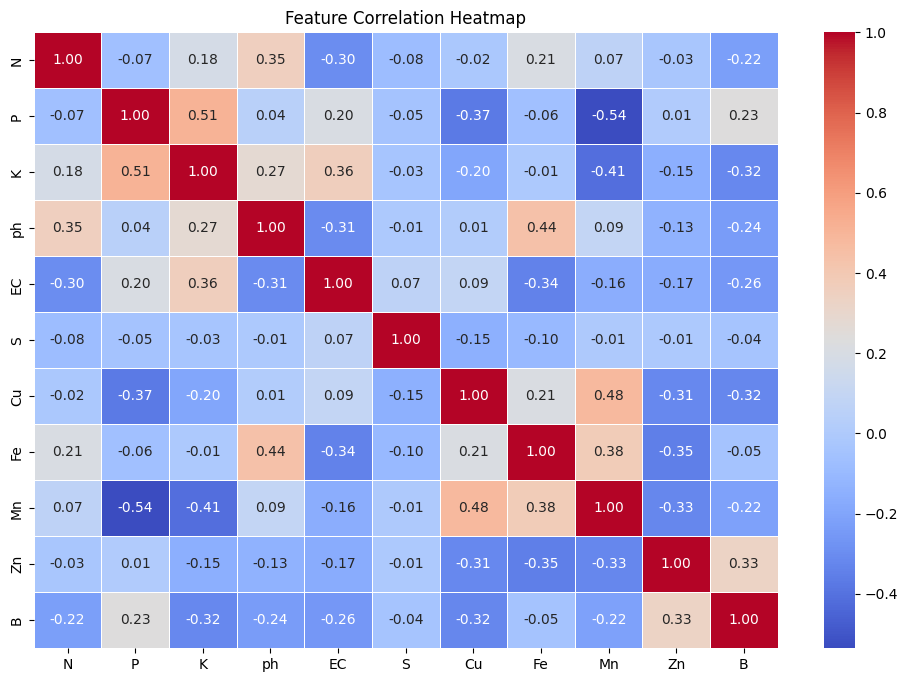

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

#### **Correlation Heatmap**
- **Strong correlations observed:**
  - **Fe and Mn (~0.90 correlation)** → These two micronutrients tend to be high together, which means one could be redundant.
  - **Zn and Cu (~0.67 correlation)** → These nutrients also show some dependency.
- **Weak correlation with pH and other nutrients** → pH levels do not directly influence most nutrient concentrations in the dataset.

**Insight:**  
- Some features may contain **redundant information** (like Fe and Mn), so we might use **feature selection techniques** to remove collinear variables.
- **pH levels are an independent variable**, meaning crops might be chosen based on both pH and nutrients separately.


## Model Implementtation 


Model Accuracy: 0.9596774193548387

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       1.00      0.95      0.97        20
           2       0.90      0.90      0.90        21
           3       1.00      0.95      0.98        21
           4       1.00      1.00      1.00        20
           5       0.91      1.00      0.95        21

    accuracy                           0.96       124
   macro avg       0.96      0.96      0.96       124
weighted avg       0.96      0.96      0.96       124



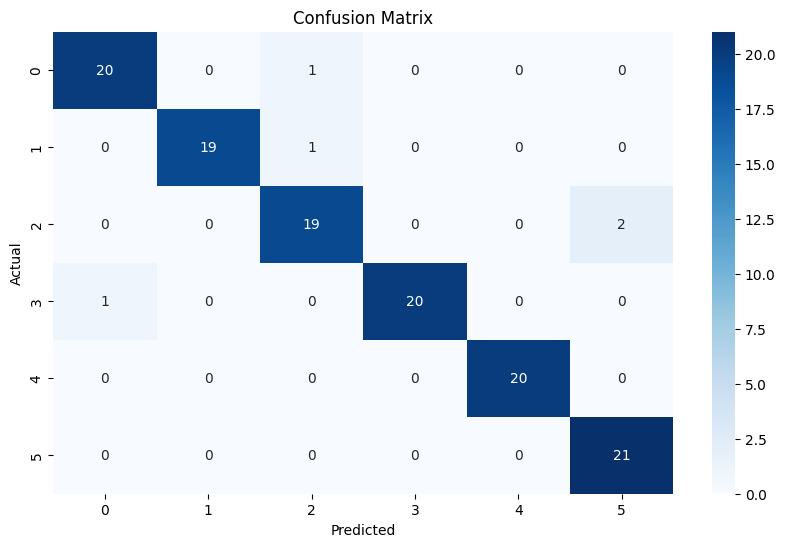

Model and scaler saved successfully!


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib


label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

X = df.drop(columns=['label'])
y = df['label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

joblib.dump(model, "crop_recommendation_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")

print("Model and scaler saved successfully!")
